In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 의사결정트리 회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [3]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [4]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 모델 생성 및 훈련

In [5]:
# ------------------------------------------
# 의사결정트리 클래스 import
# ------------------------------------------
from sklearn.tree import DecisionTreeRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = DecisionTreeRegressor()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

## 평가

In [6]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===의사결정트리 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===의사결정트리 모델의 평가결과===
R2:0.8792
RMSE:1.8120
MAE:1.3320
MSE:3.2832


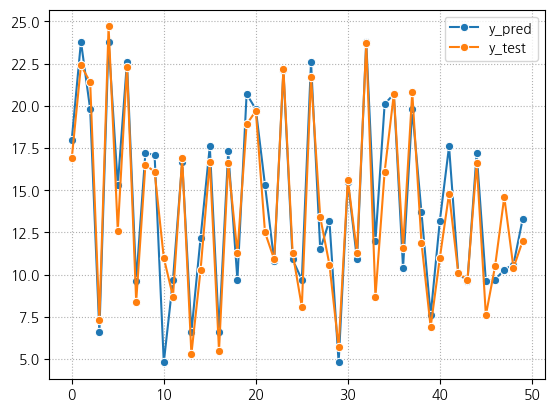

In [7]:
# ------------------------------------
# 실제값과 예측값 시각화 비교
# ------------------------------------
sns.lineplot(y_pred, marker='o', label='y_pred')
sns.lineplot(np.array(y_test), marker='o', label='y_test')
plt.grid(ls=':')
plt.legend()
pass

## 모델의 학습 결과

In [8]:
# ------------------------------------
# 트리의 깊이
# ------------------------------------
model.get_depth()

13

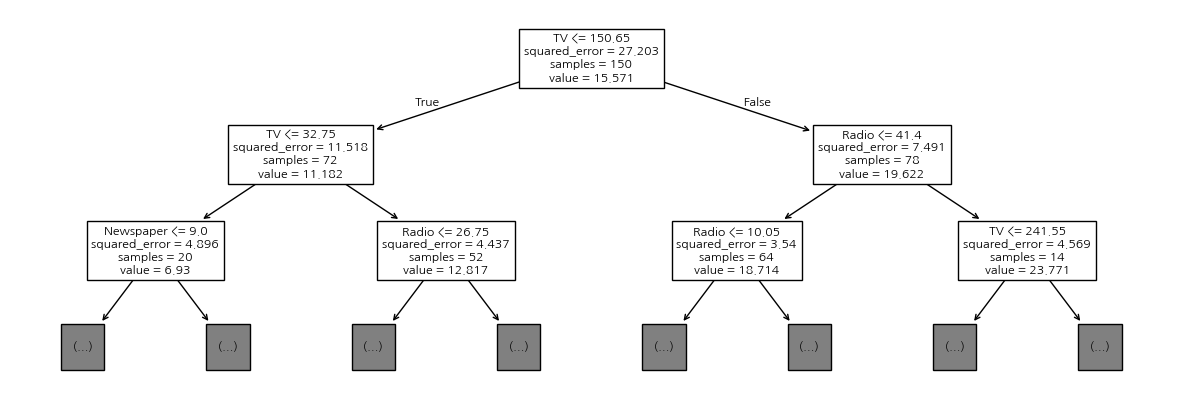

In [9]:
# ------------------------------------
# 트리 시각화
# ------------------------------------
from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(model, max_depth=2, feature_names=X_train.columns)
pass

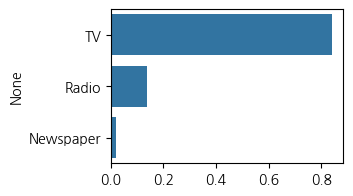

In [10]:
# ------------------------------------
# 특성의 중요도
# ------------------------------------
plt.figure(figsize=(3,2))
sns.barplot(y=X_train.columns, x=model.feature_importances_);

## 과대적합여부 확인

In [11]:
# -----------------------------------
# 훈련데이터의 예측값
# -----------------------------------
y_train_pred = model.predict(X_train)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('===의사결정트리 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===의사결정트리 모델의 평가결과===
R2:1.0000
RMSE:0.0000
MAE:0.0000
MSE:0.0000


# 랜덤포레스트 회귀

## 머신러닝

In [12]:
# ------------------------------------------
# RandomForestRegressor 클래스 import
# ------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = RandomForestRegressor()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

## 평가

In [17]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===랜덤포레스트 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===랜덤포레스트 모델의 평가결과===
R2:0.8885
RMSE:1.7409
MAE:1.3160
MSE:3.0306


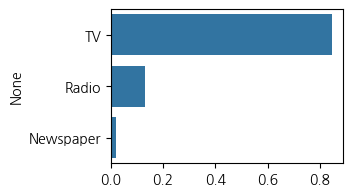

In [14]:
# --------------------
# 특성의 중요도
# --------------------
plt.figure(figsize=(3,2))
sns.barplot(y=X_train.columns, x=model.feature_importances_);

# K-최근접 이웃 회귀

In [15]:
# ------------------------------------------
# KNeighborsRegressor 클래스 import
# ------------------------------------------
from sklearn.neighbors import KNeighborsRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = KNeighborsRegressor()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

In [18]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===k-최근접 이웃 회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===k-최근접 이웃 회귀 모델의 평가결과===
R2:0.8885
RMSE:1.7409
MAE:1.3160
MSE:3.0306
